<h2 align="center">HIGHER EDUCATION 2016 CHALLENGE</h3> 

__Objective__: explore the dataset containing the results of the exams taken in 2016 and create a model that will predict the math scores (column NU_NOTA_MT).

- IMPORT LIBRARIES

In [1]:
#data analysis libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from pprint import pprint

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


- LOAD THE DATA

In [2]:
train = pd.read_csv("train.csv",header = 0)
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [3]:
test = pd.read_csv("test.csv",header = 0)
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


### 1. Data Exploration

In [4]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [5]:
test_columns = ['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047']

Train set has a total of 167 columns and the test set has a total of 47. One option would be to use the extra features for unsupervised learning of create dummy variables. However, as the number of missing columns is hight high (120), I will remove these from the test set instead.

In [6]:
clean_train = train[test_columns]
clean_train

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,80.0,580.0,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,NaN,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,NaN,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,NaN,E,D,C,A,A,B,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,35,SP,20,M,1,1,1,3,1,...,40.0,440.0,E,E,G,B,B,B,C,A
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,26,PE,33,F,3,2,1,10,1,...,80.0,560.0,A,A,C,A,B,B,I,A
13727,5354503700ecf2388f68990435390b6e1ad454ee,43,RS,15,F,1,1,3,0,1,...,120.0,600.0,C,G,B,A,B,A,NaN,A
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,33,RJ,36,M,3,1,4,0,1,...,100.0,460.0,B,D,G,B,B,C,E,A


In [7]:
clean_train.describe(include = "all")

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
count,13730,13730.000000,13730,13730.000000,13730,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,...,10133.000000,10133.000000,13730,13730,13730,13730,13730,13730,6357,13730
unique,13730,NaN,27,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8,8,17,5,2,3,13,5
top,19e04d6b035f0c812ca9b2ce1f70f86b9f7d0bd2,NaN,SP,NaN,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,B,E,B,B,B,A,F,A
freq,1,NaN,2138,NaN,8491,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3309,3883,4264,6441,7815,7215,1267,11726
mean,NaN,30.736708,NaN,21.593809,NaN,2.185652,1.048871,1.782666,2.146176,1.353532,...,77.372446,529.048258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.862405,NaN,7.043654,NaN,1.007285,0.258895,0.880734,3.217328,0.558472,...,43.067140,154.294758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,11.000000,NaN,13.000000,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,23.000000,NaN,17.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,...,40.000000,440.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,19.000000,NaN,3.000000,1.000000,2.000000,0.000000,1.000000,...,80.000000,540.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,35.000000,NaN,23.000000,NaN,3.000000,1.000000,2.000000,3.000000,2.000000,...,100.000000,600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#check the type of data we are dealing with
clean_train.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

In [9]:
'''Check for the columns that are objects as these will need to be converted to a numerical form.
This will help decide whether these columns should be removed (considering the percentage of null values and whether these 
are relevant to the analysis'''

clean_train.dtypes[clean_train.dtypes == object]

NU_INSCRICAO        object
SG_UF_RESIDENCIA    object
TP_SEXO             object
CO_PROVA_CN         object
CO_PROVA_CH         object
CO_PROVA_LC         object
CO_PROVA_MT         object
Q001                object
Q002                object
Q006                object
Q024                object
Q025                object
Q026                object
Q027                object
Q047                object
dtype: object

- CHECK FOR MISSING VALUES 

In [10]:
#check for null values in the train set
percent_missing_train = clean_train.isnull().sum() * 100 / len(clean_train)
missing_value_train = pd.DataFrame({'column_name': clean_train.columns,
                                 'percent_missing': percent_missing_train})
missing_value_train.sort_values(by = 'percent_missing', ascending=False).head(15) 

,column_name,percent_missing
TP_DEPENDENCIA_ADM_ESC,TP_DEPENDENCIA_ADM_ESC,68.812819
TP_ENSINO,TP_ENSINO,68.812819
Q027,Q027,53.699927
NU_NOTA_COMP1,NU_NOTA_COMP1,26.198106
NU_NOTA_LC,NU_NOTA_LC,26.198106
NU_NOTA_MT,NU_NOTA_MT,26.198106
NU_NOTA_REDACAO,NU_NOTA_REDACAO,26.198106
NU_NOTA_COMP5,NU_NOTA_COMP5,26.198106
TP_STATUS_REDACAO,TP_STATUS_REDACAO,26.198106
NU_NOTA_COMP4,NU_NOTA_COMP4,26.198106


In [11]:
#check for null values in the test set 
percent_missing_test = test.isnull().sum() * 100 / len(test)
missing_value_test = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing_test})
missing_value_test.sort_values(by = 'percent_missing', ascending=False).head(15) 

,column_name,percent_missing
TP_DEPENDENCIA_ADM_ESC,TP_DEPENDENCIA_ADM_ESC,67.657343
TP_ENSINO,TP_ENSINO,67.657343
Q027,Q027,54.370629
NU_NOTA_COMP2,NU_NOTA_COMP2,26.201923
NU_NOTA_LC,NU_NOTA_LC,26.201923
TP_STATUS_REDACAO,TP_STATUS_REDACAO,26.201923
NU_NOTA_REDACAO,NU_NOTA_REDACAO,26.201923
NU_NOTA_COMP5,NU_NOTA_COMP5,26.201923
NU_NOTA_COMP1,NU_NOTA_COMP1,26.201923
NU_NOTA_COMP4,NU_NOTA_COMP4,26.201923


In [12]:
clean_train.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [13]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

### 2. Data Cleaning

- HANDLE MISSING DATA

All null values in the columns relating to other subjects scores (starting with NU_) will be filled with 0.

The remaining columns with missing values over 30% wil be removed as well as other columns that are not relevant for the analysis.

In [14]:
clean_train.drop(['NU_INSCRICAO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO', 'Q027', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT','TP_STATUS_REDACAO'], 
                 axis=1, inplace=True)

C:\Users\Ana\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
test.drop(['NU_INSCRICAO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO', 'Q027', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT','TP_STATUS_REDACAO'], 
          axis=1, inplace=True)

In [16]:
clean_train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

C:\Users\Ana\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### 3. Data Preparation

- CONVERTING STRINGS TO NUMERICAL DATA

In [17]:
clean_train.dtypes[clean_train.dtypes == object]

SG_UF_RESIDENCIA    object
TP_SEXO             object
Q001                object
Q002                object
Q006                object
Q024                object
Q025                object
Q026                object
Q047                object
dtype: object

In [18]:
#Gender column
clean_train['TP_SEXO'] = clean_train['TP_SEXO'].map({'M': 0,'F': 1})
test['TP_SEXO'] = test['TP_SEXO'].map({'M': 0,'F': 1})

C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#States column
LE = LabelEncoder()
clean_train['SG_UF_RESIDENCIA'] = LE.fit_transform(clean_train['SG_UF_RESIDENCIA'])
test['SG_UF_RESIDENCIA'] = LE.fit_transform(test['SG_UF_RESIDENCIA'])

C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
test['SG_UF_RESIDENCIA'].unique()

array([17,  9,  5, 13, 22, 25, 12, 19, 15, 14, 18, 10,  4, 20,  2,  8,  1,
        6, 23,  7, 26, 16,  3,  0, 11, 24, 21])

In [21]:
#Q001 - Q047 columns 
clean_train.replace(['C', 'B', 'L', 'A', 'J', 'F', 'D', 'H', 'G', 'E', 'I', 'O', 'N','K', 'M', 'Q', 'P'], 
                     [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], inplace=True) 
test.replace(['C', 'B', 'L', 'A', 'J', 'F', 'D', 'H', 'G', 'E', 'I', 'O', 'N','K', 'M', 'Q', 'P'], 
                     [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], inplace=True) 

C:\Users\Ana\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


- CONVERTING FLOATs TO INTs (for regression models)

In [22]:
train_df = clean_train.astype(float)
test_df = test.astype(float)

- COMBINING BOTH TRAIN AND TEST SETS IN A SINGLE DATA FRAME

Now that the data is cleaned we can combine both train and test sets in order to increase the size of our sample. Later on we will break this up again into train and test set.

In [23]:
df = pd.concat([train_df,test_df],axis=0)

### 4. Feature Selection

Let's see the correlation of independent variables with the output variable NU_NOTA_MT. I will only select features that have correlation of above 0.1 (taking absolute value) with the output variable.

The correlation coefficient has values between -1 to 1
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

In [24]:
#Using Pearson Correlation
cor = train_df.corr()
#Correlation with output variable
cor_target = abs(cor["NU_NOTA_MT"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
#Creating a dataframe
relevant_feat_df = pd.DataFrame({'feat':relevant_features.index, 'values':relevant_features.values})
relevant_feat_df

,feat,values
0,TP_PRESENCA_CN,0.874764
1,TP_PRESENCA_CH,0.874764
2,TP_PRESENCA_LC,0.923641
3,NU_NOTA_CN,0.907039
4,NU_NOTA_CH,0.903608
5,NU_NOTA_LC,0.943954
6,NU_NOTA_MT,1.000000
7,NU_NOTA_COMP1,0.882746
8,NU_NOTA_COMP2,0.862709
9,NU_NOTA_COMP3,0.854946


In [25]:
#dropping the target variable from the dataframe
relevant_feat_df.drop(relevant_feat_df.index[6], inplace = True)

### 5. Splitting the Dataset & Preprocessing

In [26]:
#creating the variables for the train set
y = train_df['NU_NOTA_MT']
X = train_df[relevant_feat_df['feat']]

In [27]:
y

0        399.4
1        459.8
2          0.0
3          0.0
4          0.0
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 13730, dtype: float64

In [28]:
X

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1.0,1.0,1.0,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0
1,1.0,1.0,1.0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1.0,1.0,1.0,438.2,419.7,394.5,120.0,120.0,80.0,80.0,40.0,440.0
13726,1.0,1.0,1.0,423.8,557.9,533.0,120.0,120.0,120.0,120.0,80.0,560.0
13727,1.0,1.0,1.0,460.5,528.9,569.3,120.0,120.0,120.0,120.0,120.0,600.0
13728,1.0,1.0,1.0,422.5,621.7,569.0,100.0,100.0,80.0,80.0,100.0,460.0


In order to get started, I first have to divide the data into a training set and a testing set. I set 80% to be training and 20% for testing, and set a reproducible random state so my analysis can be replicated.

In [29]:
#Selecting 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 29)

In [30]:
#Standarize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### 5. IMPLEMENTING THE MODELS

Grid search is a common method for tuning a model’s hyperparameters. You feed it a set of hyperparameters and the values you want to test for each hyperparameter, and then run an exhaustive search over all possible combinations of these values, training one model for each set of values. The algorithm then compares the scores of each model it trains and keeps the best one. A common extension of grid search is to use it alongside cross validation, training on several different folds for each hyperparameter combination to have a more reliable estimate of each model’s performance out of sample.

- RANDOM FOREST

In [31]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={'max_depth': range(3,22),                #max_depth refers to the maximum depth of the tree
                'n_estimators': (100, 200, 300),    #n_estimators refers to the number of trees in the forest
                #'min_samples_split': [1,2,5,10,15,100],
                #'min_samples_leaf': [1,2,5,10],
                #'max_features': ['log2', 'sqrt', 'auto', None]
    },
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)

In [32]:
rfr = grid_result.best_estimator_
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
rfr.score(X_test, y_test)

0.924895627567124

K-fold cross validation works by breaking your training data into K equal-sized “folds.” It iterates through each fold, treating that fold as holdout data, training a model on all the other K-1 folds, and evaluating the model’s performance on the one holdout fold. This results in having K different models, each with an out of sample model accuracy score on a different holdout set. The average of these K models’ out-of-sample scores is the model’s cross-validation score.

In [34]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X, y)
scores

array([0.9256995 , 0.92140884, 0.91687287, 0.92684373, 0.91939863])

In [35]:
scores.mean() * 100

92.2044713123666

- DECISION TREE

In [36]:
# Perform Grid-Search
dtr_gsc = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100]})

dtr_grid_result = dtr_gsc.fit(X_train, y_train)

In [37]:
dtr = dtr_grid_result.best_estimator_
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
dtr.score(X_test, y_test)

0.922349778368699

In [39]:
# Perform K-Fold CV
scores = cross_val_score(dtr, X, y)
scores

array([0.92387479, 0.92000667, 0.91589663, 0.92397064, 0.91727337])

In [40]:
scores.mean() * 100

92.02044209725425

- KNN 

In [60]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsRegressor(n_neighbors=5)

knn_gsc = GridSearchCV(knn, param_grid, cv=10, scoring='r2')
# fit the grid with data
knn_grid_result = knn_gsc.fit(X_train, y_train)

knn = knn_grid_result.best_estimator_
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='uniform')

In [61]:
knn.score(X_test, y_test)

0.9163791863872361

- PLOTTING PREDICTION ERROR

PredictionError plots the expected vs. the actual values in the model space. It visualizes prediction errors as a scatterplot of the predicted and actual values. We can then visualize the line of best fit and compare it to the 45º line.

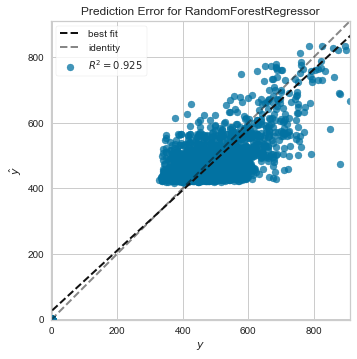

In [41]:
#Random Forest 
visualizer = prediction_error(rfr, X_train, y_train, X_test, y_test)

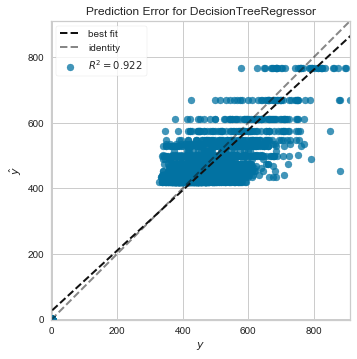

In [42]:
#Decision Tree
visualizer = prediction_error(dtr, X_train, y_train, X_test, y_test)